# Gradient Boost Regressor


In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

### Read csv first to analyze the dependent and independent variable ,which is used directly by the class

In [2]:
dataset = pd.read_csv('BostonHousing.csv')     # Put you filename here
dataset                                   # show the dataset

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


### Creating class

In [3]:
class GradientBoostingRegressor_n:
    def __init__(self, dataset, NameofIndependentVar, NameofDependentVar ,split_fraction = None, cross_validation = None, learning_rate = None,
                 n_estimators= None,max_depth  = None):
        if split_fraction is None:
            split_fraction = 0.2 
        if learning_rate is None:
            learning_rate = 0.01   
        if max_depth is None:
            learning_rate = 8   
        if n_estimators is None:
            n_estimators = 100
        if cross_validation is None:
            cross_validation = 5 
        self.max_depth = max_depth    
        self.n_estimators = n_estimators    
        self.cross_validation = cross_validation
        self.split_fraction = split_fraction
        self.dataset = dataset
        self.NameofIndependentVar = NameofIndependentVar
        self.NameofDependentVar = NameofDependentVar
        self.learning_rate = learning_rate
    
    def test(self):
        # load and describe data
        dataset_n  =  pd.read_csv(self.dataset)
        print("Shape of Dataset   ---> " , str(dataset_n.shape) + "\n\n\n" )
        print("Describe the Dataset   ---> " + "\n")
        print(dataset_n.describe())
        Var_X = self.NameofIndependentVar
        Var_Y = self.NameofDependentVar
        
        #Histogram plot of dependent variable
        plt.figure(figsize=(15,10))
        plt.tight_layout()
        seabornInstance.distplot(dataset_n[Var_Y])
        
        # Splitting independent and dependent variable
        X = dataset_n[Var_X].values
        y = dataset_n[Var_Y].values
        
        # Splitting into train and test
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=self.split_fraction, random_state=0)
        print("\n\n\n")
        print("Shape of training data   ---> ",str(X_train.shape))
        print("Shape of test data   ---> ",str(X_test.shape))
        
        
        #Creating dictionary for parameters for gridsearch
        parametersGrid = parameters = {
                                        "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
                                        "max_depth":[3,5,8,16,32],
                                        "n_estimators":[l for l in range(self.n_estimators, 1, -20)] 
    }

        #Fitting the train data 
        
        gradboost_regressor =  GridSearchCV(GradientBoostingRegressor(), parameters, cv=self.cross_validation, n_jobs=-1)
        gradboost_regressor.fit(X_train, y_train)
        
        #Prediction of result
        Y_predicted = gradboost_regressor.predict(X_test)
        
        # Best parameters learned by Ridge Regression
        print("\n\n\n")
        print("Value of best parameters   ---> ")
        print(gradboost_regressor.best_params_)
        print(gradboost_regressor.best_score_)
        
        # Creating dataframe of test and predicted value
        df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': Y_predicted.flatten()})
        print("\n\n\n")
        print("Value of test and predicted data   ---> "+"\n")
        print(df)
        print("\n\n\n")
        # Plot first few predicted and test values
        print("Compare histogram of dependent variable and graph of first few test vs predicted value   ---> "+ "\n")
        df1 = df.head(25)
        df1.plot(kind='bar',figsize=(16,10))
        plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
        plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
        plt.show()
        print("\n\n\n")
  
        # Calculating the metric
        print("The value of different Errors   ---> "+"\n")
        print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, Y_predicted))  
        print('Mean Squared Error:', metrics.mean_squared_error(y_test, Y_predicted))  
        print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, Y_predicted)))

#### Input of class

GradientBoostingRegressor_n('file_location.csv'[IndependentVariable],DependentVariable,test_train_split,no_of_k_folds,max_depth_of_tree,n_estimators)

Note 
   - The dataset file should be in .csv format and it should be a cleaned dataset(Categorical data should be pre-processed)
   - The independent variables should be input as list 
   - change the other parameters mannualy . It can be feed into parameter dictionary which is used for Grid search

In [4]:
grad = GradientBoostingRegressor_n('BostonHousing.csv',['crim','zn','indus','chas','nox','rm','age','dis','rad','tax','ptratio','lstat'],'medv',0.2,n_estimators=100)

Shape of Dataset   --->  (506, 14)



Describe the Dataset   ---> 

             crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677082   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              age         dis         rad         tax     ptratio           b  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.54940

C:\Users\boltuzamaki\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "






Shape of training data   --->  (404, 12)
Shape of test data   --->  (102, 12)




Value of best parameters   ---> 
{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
0.8876613254067751




Value of test and predicted data   ---> 

     Actual  Predicted
0      22.6  24.820079
1      50.0  31.312697
2      23.0  24.097790
3       8.3  10.385255
4      21.2  22.331157
5      19.9  20.390475
6      20.6  20.669418
7      18.7  20.611780
8      16.1  24.273796
9      18.6  19.869794
10      8.8   7.433946
11     17.2  14.706418
12     14.9  15.367535
13     10.5   9.686025
14     50.0  47.785753
15     29.0  33.882888
16     23.0  20.583010
17     33.3  36.569962
18     29.4  27.207683
19     21.0  22.040198
20     23.8  23.140371
21     19.1  22.061443
22     20.4  19.850059
23     29.1  25.177112
24     19.3  21.241591
25     23.1  20.729848
26     19.6  18.023807
27     19.4  16.448366
28     38.7  40.786069
29     18.7  18.975108
..      ...        ...
72     23.5  25.9697

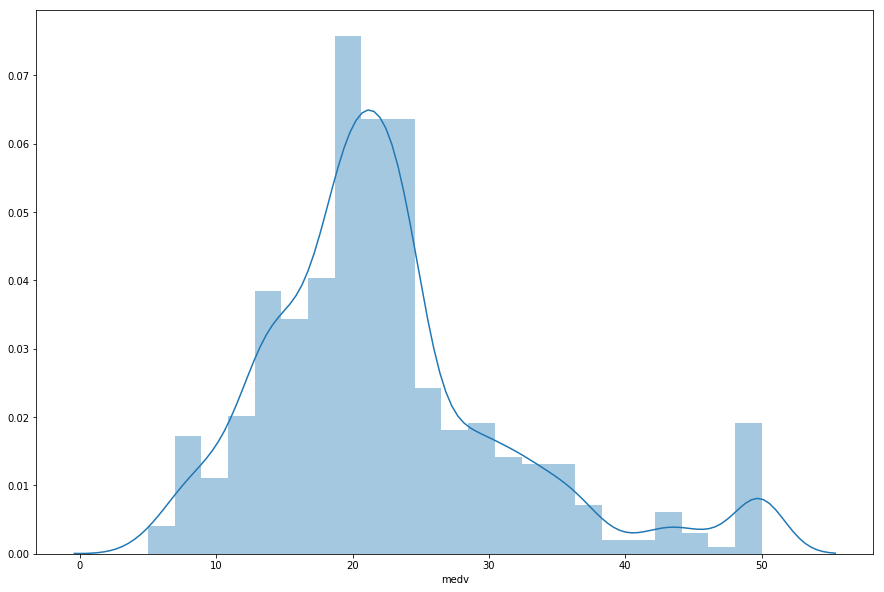

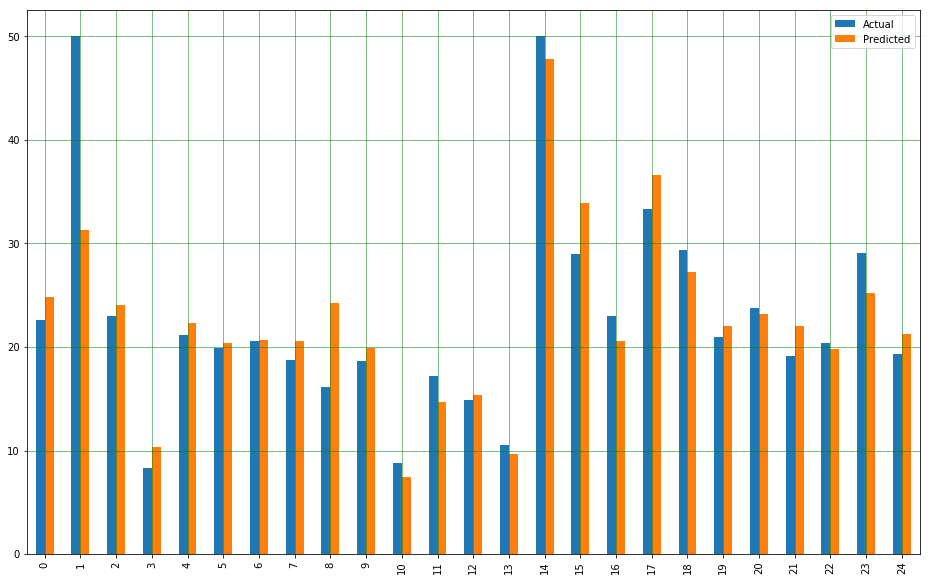





The value of different Errors   ---> 

Mean Absolute Error: 2.6381880963770032
Mean Squared Error: 17.09656495152566
Root Mean Squared Error: 4.134799263752191


In [5]:
grad.test()